In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [2]:
# dates = pd.date_range("2024-01-01", periods=100)

In [3]:
# values = np.random.rand(100)

In [4]:
# data = pd.DataFrame({
#     "Fecha": dates,
#     "Valores": values
# })

In [5]:
# fig, ax = plt.subplots(figsize=(10, 5))

# ax.plot(data["Fecha"], data["Valores"], color="green")
# plt.xticks(rotation=45)
# plt.title("Serie de tiempo")
# plt.xlabel("Fecha")
# plt.ylabel("Valores")
# plt.show()

In [6]:
df = pd.read_csv("files/online_retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["year"] = df["InvoiceDate"].dt.year
df["month"] = df["InvoiceDate"].dt.month

In [27]:
r = df.pivot_table(index=("year", "month"), values="Quantity", aggfunc="sum")
r

Quantity
year month          
2010 12       342228
2011 1        308966
     2        277989
     3        351872
     4        289098
     5        380391
     6        341623
     7        391116
     8        406199
     9        549817
     10       570532
     11       740286
     12       226333

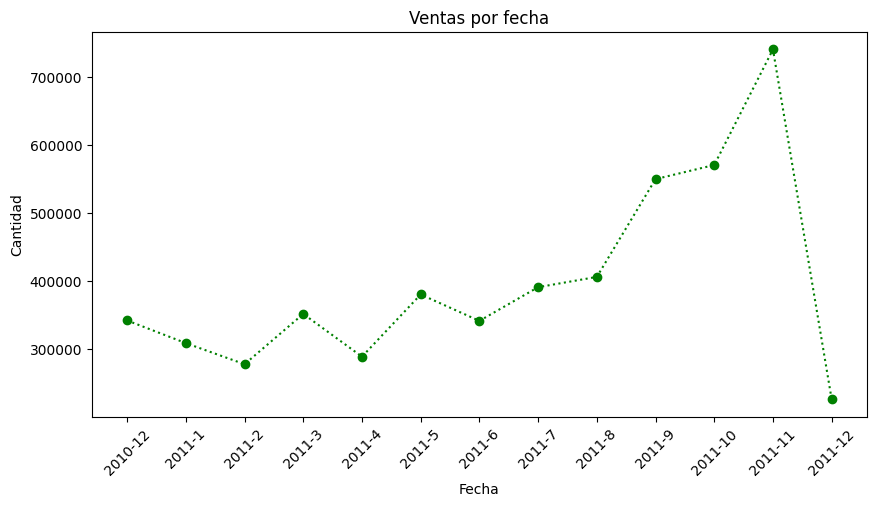

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
fechas = [f"{x[0]}-{x[1]}" for x in r.index]
ax.plot(fechas, r, color="green", marker="o", linestyle=":")
plt.xticks(rotation=45)
plt.title("Ventas por fecha")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.show()